# Fruit Recognition System

In [233]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data, color, feature
from skimage.feature import hog
from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import Dataset

We have two folders for Training and Testing of Fruits containing 15 different fruits.

In [234]:
Data_Train = "F:\Training"
Data_Test = "F:\Testing"

# Load Dataset

As we have two different folders for testing and training images, load dataset contains two conditions for seperate folders. In this function, ech image has been read and stored in 'DATA' after converting into RGB as cv2 reads images in BGR pattern. There labels are stores in 'LABEL'.

In [235]:
def load_dataset(fruit_name, data_type):
    label=[]
    data = []
    
    if data_type=='Training':
        strr = "F:/Training/"+fruit_name+ "/*"
        for file_ in glob.glob(strr):
            img = cv2.imread(file_)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            label.append(fruit_name)
            
    elif data_type=='Testing':
        strr = "F:/Testing/"+fruit_name+ "/*"
        for file in glob.glob(strr):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(np.array(img))
            label.append(np.array(fruit_name))
    return data,label


# Train Dataset

In this function, we have passed each folder of data to be loaded in DATA. At the end, all the images are concatenated.

In [236]:
def train_data(data_type):
    apple_data, apple_label = load_dataset('Apple', data_type)
    banana_data, banana_label = load_dataset('Banana', data_type)
    guava_data, guava_label = load_dataset('Guava', data_type)
    kiwi_data, kiwi_label = load_dataset('Kiwi', data_type)
    lychee_data, lychee_label = load_dataset('Lychee', data_type)
    mango_data, mango_label = load_dataset('Mango', data_type)
    orange_data, orange_label = load_dataset('Orange', data_type)
    papaya_data, papaya_label = load_dataset('Papaya', data_type)
    peach_data, peach_label = load_dataset('Peach', data_type)
    pear_data, pear_label = load_dataset('Pear', data_type)
    pineapple_data, pineapple_label = load_dataset('Pineapple', data_type)
    plum_data, plum_label = load_dataset('Plum', data_type)
    pomegranate_data, pomegranate_label = load_dataset('Pomegranate', data_type)
    strawberry_data, strawberry_label = load_dataset('Strawberry', data_type)
    data =np.concatenate((apple_data, banana_data, guava_data, kiwi_data, lychee_data, mango_data, orange_data, papaya_data, peach_data, pear_data, pineapple_data, pomegranate_data,strawberry_data))
    label =np.concatenate((apple_label, banana_label, guava_label, kiwi_label, lychee_label, mango_label, orange_label, papaya_label, peach_label, pear_label, pineapple_label, pomegranate_label,strawberry_label))
    return data, label

In [237]:
trained_data, trained_labels = train_data('Training') #traning data being stored
tested_data, tested_labels = train_data('Testing') #testing data being stored
print(trained_data.shape, trained_labels.shape)

(6347, 100, 100, 3) (6347,)


# Training Data Samples

In this function, 14 random images from training dataset has been shown.

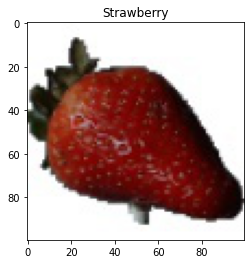

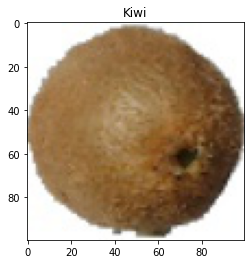

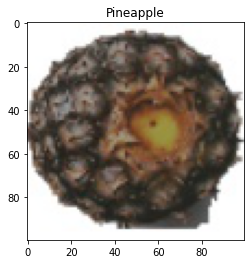

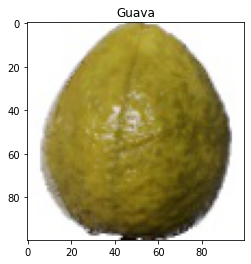

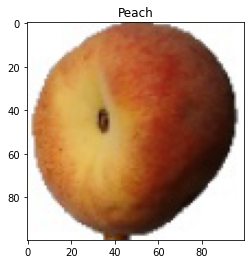

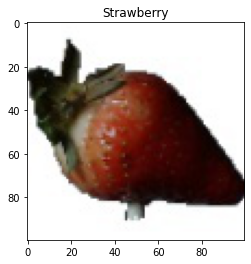

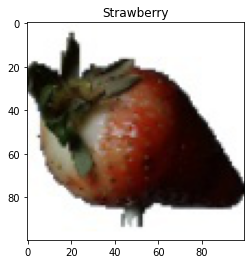

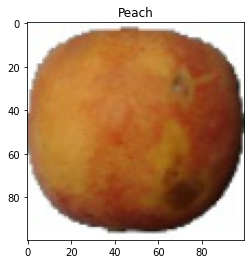

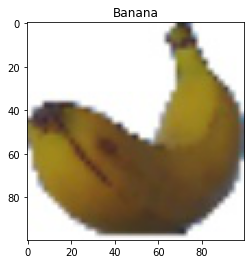

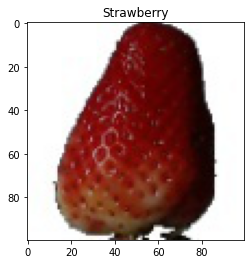

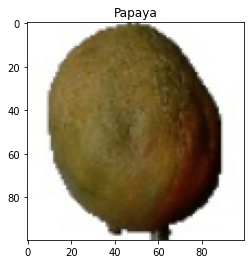

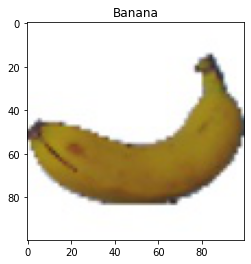

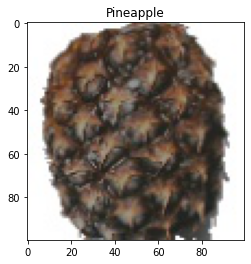

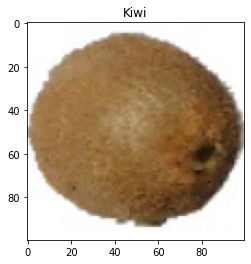

In [238]:
def show_data(img, name):
    plt.title(name)
    plt.imshow(img)
    plt.show()
    
for i in range(14): 
    x = randint(0, trained_data.shape[0])
    show_data(trained_data[x], trained_labels[x])

# Preprocessing (Features)

In [239]:
def preprocessing_feature(data):
    prep_data=[]
    for i in range(data.shape[0]):
        img=cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72), anti_aliasing=True)
        prep_data.append(np.array(img))
    return prep_data

In [240]:
preprocessed_data_train = preprocessing_feature(trained_data)
preprocessed_data_test = preprocessing_feature(tested_data)

# Preprocessing (Histogram)

In [241]:
def Extract_Histogram(img):
    hist,_= hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    return hist
  
def preprocessing_histogram(data):
    data_features=[]
    for val in range(np.shape(data)[0]):
        data_features.append(Extract_Histogram(data[val])) 
    return data_features

In [242]:
preprocessed_data_train = preprocessing_histogram(preprocessed_data_train)
preprocessed_data_test= preprocessing_histogram(preprocessed_data_test)

# KNN Classification

In [243]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf.fit(preprocessed_data_train, trained_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [244]:
y_knn_pred = knn_clf.predict(preprocessed_data_test)

# Accuracy

In [245]:
print(accuracy_score(tested_labels, y_knn_pred)*100,'%')

93.20585842148088 %


In [252]:
def show_results(img, title):
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Result

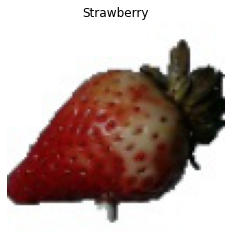

In [253]:
x = randint(0, tested_data.shape[0])
show_results(tested_data[x], y_knn_pred[x])